In [1]:
# Dependencies
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as stats
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns

# CSV file paths
csvfile = r"Raw Data/Education.csv"
csvfile2 = r"Raw Data/SAIPESNC.csv"
csvfile3 = r"Raw Data/2012-2016 CardioVasc Mortality Rates.csv"

In [2]:
# Reading Education Level csv file and cleaning data
education_df = pd.read_csv(csvfile)
del education_df["Less than a high school diploma, 2012-2016"]
del education_df["State"]
del education_df["Area name"]
del education_df["High school diploma only, 2012-2016"]
del education_df["Some college or associate's degree, 2012-2016"]
del education_df["Bachelor's degree or higher, 2012-2016"]
education_df.columns = ["County Code", "% <High School", "% High School", "% Associate", "% >Bachelor"]
education_df.head()

,County Code,% <High School,% High School,% Associate,% >Bachelor
0,0,13.0,27.5,29.1,30.3
1,1001,12.4,34.3,28.7,24.6
2,1003,10.0,28.7,31.8,29.5
3,1005,26.2,34.9,26.0,12.9
4,1007,19.3,41.8,26.9,12.0


In [3]:
# Reading Income Level csv file and cleaning data
income_df = pd.read_csv(csvfile2)
del income_df["All Ages SAIPE Poverty Universe"]
del income_df["All Ages in Poverty Count"]
del income_df["All Ages in Poverty Count LB 90%"]
del income_df["All Ages in Poverty Count UB 90%"]
del income_df["All Ages in Poverty Percent"]
del income_df["All Ages in Poverty Percent LB 90%"]
del income_df["All Ages in Poverty Percent UB 90%"]
del income_df["Median Household Income in Dollars LB 90%"]
del income_df["Median Household Income in Dollars UB 90%"]
del income_df["State"]
del income_df["State / County Name"]
income_df.columns = ["County Code", "Median Household Income ($)"]
income_df.head()

,County Code,Median Household Income ($)
0,0,54134
1,1001,53748
2,1003,50976
3,1005,32111
4,1007,40113


In [4]:
# Reading Mortality data for CardioVacs and cleaning data
mortality_df = pd.read_csv(csvfile3)
del mortality_df["Notes"]
del mortality_df["State Code"]
del mortality_df["State"]
del mortality_df["Crude Rate Lower 95% Confidence Interval"]
del mortality_df["Crude Rate Upper 95% Confidence Interval"]
del mortality_df["Crude Rate Standard Error"]
mortality_df.columns = ["County", "County Code", "Deaths", "Population", "Crude Rate"]
mortality_df.head()

,County,County Code,Deaths,Population,Crude Rate
0,"Autauga County, AL",1001,188.0,144568.0,130
1,"Baldwin County, AL",1003,581.0,514161.0,113
2,"Barbour County, AL",1005,118.0,71488.0,165.1
3,"Bibb County, AL",1007,123.0,62810.0,195.8
4,"Blount County, AL",1009,194.0,148438.0,130.7


In [5]:
# Combine income and education data
combined_df = pd.merge(income_df,education_df, on = "County Code")
combined_df.head()

,County Code,Median Household Income ($),% <High School,% High School,% Associate,% >Bachelor
0,0,54134,13.0,27.5,29.1,30.3
1,1001,53748,12.4,34.3,28.7,24.6
2,1003,50976,10.0,28.7,31.8,29.5
3,1005,32111,26.2,34.9,26.0,12.9
4,1007,40113,19.3,41.8,26.9,12.0


In [6]:
# Merging all 3 data and reorder columns
all_data_df = pd.merge(combined_df, mortality_df, on = "County Code")
all_data_df = all_data_df[["County Code", "County", "Population", "Deaths", "Crude Rate", "Median Household Income ($)", "% <High School", "% High School", "% Associate", "% >Bachelor"]]
all_data_df = all_data_df[all_data_df["Crude Rate"] != "Unreliable"]
all_data_df.head()

,County Code,County,Population,Deaths,Crude Rate,Median Household Income ($),% <High School,% High School,% Associate,% >Bachelor
0,1001,"Autauga County, AL",144568.0,188.0,130,53748,12.4,34.3,28.7,24.6
1,1003,"Baldwin County, AL",514161.0,581.0,113,50976,10.0,28.7,31.8,29.5
2,1005,"Barbour County, AL",71488.0,118.0,165.1,32111,26.2,34.9,26.0,12.9
3,1007,"Bibb County, AL",62810.0,123.0,195.8,40113,19.3,41.8,26.9,12.0
4,1009,"Blount County, AL",148438.0,194.0,130.7,46377,20.0,32.9,34.0,13.1


In [7]:
mean_years_schooling = []
for index, row in all_data_df.iterrows():
    mean_years_schooling.append(((row['% <High School']*10) + (row['% High School'] * 12) + (row['% Associate'] * 14)
                              + (row['% >Bachelor'] * 20))/100)
    
all_data_df["MYS"] = mean_years_schooling

# Convert column from object to number
all_data_df["Median Household Income ($)"] = pd.to_numeric(all_data_df["Median Household Income ($)"])
all_data_df["Crude Rate"] = pd.to_numeric(all_data_df["Crude Rate"], errors="Unreliable")
# all_data_df.to_csv("all_data_df.csv", index=False)


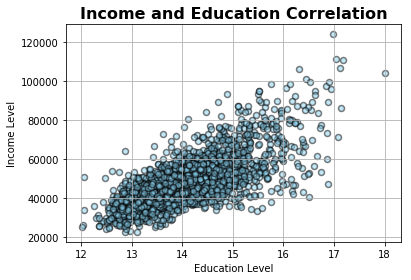

In [8]:
plt.scatter(all_data_df["MYS"],all_data_df["Median Household Income ($)"], facecolor = "skyblue", edgecolors="black", alpha = 0.5, linewidth = 1.5)
plt.title("Income and Education Correlation", fontsize = 16, fontweight="bold")
plt.xlabel("Education Level")
plt.ylabel("Income Level")
plt.grid()
plt.show()

In [9]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff
plotly.tools.set_credentials_file(username='andrewkrog', api_key='srXlzccNxXRUUsUM9uPn')

import numpy as np
import pandas as pd

colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
            "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
            "#08519c","#0b4083","#08306b"]
              
endpts = list(np.linspace(0, 125000, len(colorscale) - 1))
fips = all_data_df['County Code'].tolist()
values = all_data_df['Median Household Income ($)'].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['usa'],
    binning_endpoints=endpts, colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Median Household Income ($)',
    legend_title='Median Household Income ($)',
)
py.iplot(fig, filename='choropleth_full_usa')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~andrewkrog/0 or inside your plot.ly account where it is named 'choropleth_full_usa'


C:\Users\andre\AppData\Local\Continuum\anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



# Correlation between Income and Education Level

* Based on above data

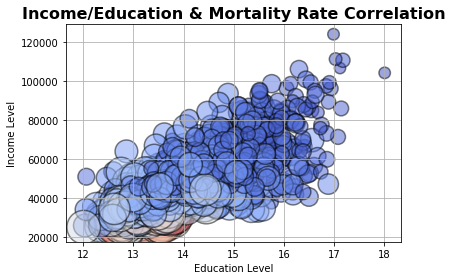

In [127]:
plt.scatter(all_data_df["MYS"],all_data_df["Median Household Income ($)"], s= all_data_df["Crude Rate"]*5, c=all_data_df["Crude Rate"], cmap = "coolwarm", edgecolors="black", alpha = 0.5, linewidth = 1.5)
plt.title("Income/Education & Mortality Rate Correlation", fontsize = 16, fontweight="bold")
plt.xlabel("Education Level")
plt.ylabel("Income Level")
plt.grid()
plt.show()

In [134]:
#Create Bin for Education Level
all_data_df["Education Level"] = 0

education_level = all_data_df["MYS"].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])[['min', '10%', '20%', '30%', 
                                                                                                '40%', '50%', '60%', '70%', 
                                                                                                '80%', '90%', 'max']]
education_level_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
all_data_df["Education Level"] = pd.cut(all_data_df["MYS"], bins=education_level, labels = education_level_labels)
all_data_df.head()


,County Code,County,Population,Deaths,Crude Rate,Median Household Income ($),% <High School,% High School,% Associate,% >Bachelor,MYS,Education Level,Income Level
0,1001,"Autauga County, AL",144568.0,188.0,130.0,53748,12.4,34.3,28.7,24.6,14.294,7,8.0
1,1003,"Baldwin County, AL",514161.0,581.0,113.0,50976,10.0,28.7,31.8,29.5,14.796,9,8.0
2,1005,"Barbour County, AL",71488.0,118.0,165.1,32111,26.2,34.9,26.0,12.9,13.028,2,1.0
3,1007,"Bibb County, AL",62810.0,123.0,195.8,40113,19.3,41.8,26.9,12.0,13.112,2,3.0
4,1009,"Blount County, AL",148438.0,194.0,130.7,46377,20.0,32.9,34.0,13.1,13.328,3,6.0


In [137]:
#Create Bin for Income Level
all_data_df["Income Level"] = 0

income_level = all_data_df["Median Household Income ($)"].describe(percentiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])[['min', '10%', '20%', '30%', 
                                                                                                '40%', '50%', '60%', '70%', 

                                                                                                                                 '80%', '90%', 'max']]
income_level_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
all_data_df["Income Level"] = pd.cut(all_data_df["Median Household Income ($)"], bins=income_level, labels = income_level_labels)
all_data_df["Education Level"] = pd.to_numeric(all_data_df["Education Level"])
all_data_df["Income Level"] = pd.to_numeric(all_data_df["Income Level"])
# all_data_df.to_csv("all_data_df.csv", index=False)
all_data_df.head()


,County Code,County,Population,Deaths,Crude Rate,Median Household Income ($),% <High School,% High School,% Associate,% >Bachelor,MYS,Education Level,Income Level
0,1001,"Autauga County, AL",144568.0,188.0,130.0,53748,12.4,34.3,28.7,24.6,14.294,7.0,8.0
1,1003,"Baldwin County, AL",514161.0,581.0,113.0,50976,10.0,28.7,31.8,29.5,14.796,9.0,8.0
2,1005,"Barbour County, AL",71488.0,118.0,165.1,32111,26.2,34.9,26.0,12.9,13.028,2.0,1.0
3,1007,"Bibb County, AL",62810.0,123.0,195.8,40113,19.3,41.8,26.9,12.0,13.112,2.0,3.0
4,1009,"Blount County, AL",148438.0,194.0,130.7,46377,20.0,32.9,34.0,13.1,13.328,3.0,6.0
